# Optimal vs Acceptable Solutions: When Is "Good Enough" Good Enough?

This notebook demonstrates the distinction between **optimal solutions** (best possible) and **acceptable solutions** (good enough).

Understanding this distinction helps you:
- Decide when to optimize and when to use simpler methods
- Recognize that optimal may not always be necessary
- Make informed choices about when to invest in optimization
- Balance optimality with speed, cost, and practicality


## Key Concepts

**Optimal Solutions**:
- The best possible solution according to your objectives
- Found through systematic optimization
- Takes time and computational resources
- May be only slightly better than acceptable solutions

**Acceptable Solutions**:
- Solutions that meet your needs adequately
- Found through heuristics or simple rules
- Found quickly with minimal resources
- May be nearly as good as optimal

**Critical insight**: Optimal is best for your objectives, but acceptable may be sufficient. The value of optimality must exceed the cost of finding it.


## Scenario: Production Planning

You need to decide how many units of two products to produce. You want to maximize profit.

**Decision**: How many units of Product A and Product B to produce?

**Option 1**: Use optimization to find the optimal solution (best profit)

**Option 2**: Use a simple heuristic to find an acceptable solution (good enough profit, found quickly)


## Step 1: Install Required Packages (Colab)

If you're running this notebook in Google Colab, you need to install the `pulp` package first. This cell can be skipped if running locally and the package is already installed.


In [25]:
# Install pulp package (required for optimization)
# This is needed in Google Colab; can be skipped if already installed locally
%pip install pulp -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, value
import time


## Step 3: Define the Problem

Set up a simple production planning problem:


In [27]:
# Problem inputs
profit_A = 50  # Profit per unit of Product A ($)
profit_B = 40  # Profit per unit of Product B ($)

capacity = 2000  # Total production capacity (units)
labor_hours = 1500  # Available labor hours
labor_per_A = 0.5  # Labor hours per unit of A
labor_per_B = 0.8  # Labor hours per unit of B

demand_A = 1200  # Maximum demand for Product A
demand_B = 1000  # Maximum demand for Product B

print("PROBLEM SETUP:")
print(f"  Profit per A: ${profit_A}")
print(f"  Profit per B: ${profit_B}")
print(f"  Capacity: {capacity} units")
print(f"  Labor hours: {labor_hours} hours")
print(f"  Demand A: {demand_A} units")
print(f"  Demand B: {demand_B} units")


PROBLEM SETUP:
  Profit per A: $50
  Profit per B: $40
  Capacity: 2000 units
  Labor hours: 1500 hours
  Demand A: 1200 units
  Demand B: 1000 units


## Step 4: Find Optimal Solution (Optimization)

Use optimization to find the best possible solution:


In [28]:
# OPTIMAL SOLUTION: Use optimization
start_time = time.time()

model = LpProblem("Production_Optimal", LpMaximize)

# Decision variables
produce_A_opt = LpVariable("produce_A_opt", lowBound=0, cat='Continuous')
produce_B_opt = LpVariable("produce_B_opt", lowBound=0, cat='Continuous')

# Objective: Maximize profit
model += profit_A * produce_A_opt + profit_B * produce_B_opt, "Total_Profit"

# Constraints
model += produce_A_opt + produce_B_opt <= capacity, "Capacity_Limit"
model += labor_per_A * produce_A_opt + labor_per_B * produce_B_opt <= labor_hours, "Labor_Limit"
model += produce_A_opt <= demand_A, "Demand_A_Limit"
model += produce_B_opt <= demand_B, "Demand_B_Limit"

# Solve
model.solve()

optimal_A = value(produce_A_opt)
optimal_B = value(produce_B_opt)
optimal_profit = value(model.objective)

optimization_time = time.time() - start_time

print("OPTIMAL SOLUTION (Optimization):")
print("=" * 60)
print(f"  Produce {optimal_A:.1f} units of Product A")
print(f"  Produce {optimal_B:.1f} units of Product B")
print(f"  Total Profit: ${optimal_profit:,.2f}")
print(f"  Time to find: {optimization_time:.4f} seconds")
print(f"\nThis is the BEST possible solution (optimal).")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/8d0c2c15f90448fca4daf40bf56fa4cb-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/8d0c2c15f90448fca4daf40bf56fa4cb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 18 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (-3) rows, 2 (0) columns and 2 (-4) elements
0  Obj -0 Dual inf 89.999998 (2)
1  Obj 92000
Optimal - objective value 92000
After Postsolve, objective 92000, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 92000 - 1 iterations time 0.002, Presolve 0.00
Option for prin

In [29]:
# ACCEPTABLE SOLUTION: Use simple heuristic
start_time = time.time()

# Heuristic: Simple equal split based on demand proportions (ignores profit optimization)
# This is a common "quick and dirty" approach that doesn't optimize
total_demand = demand_A + demand_B
demand_ratio_A = demand_A / total_demand
demand_ratio_B = demand_B / total_demand

# Allocate capacity proportionally to demand
acceptable_A = min(demand_A, capacity * demand_ratio_A)
acceptable_B = min(demand_B, capacity * demand_ratio_B)

# Adjust if exceeds capacity
if acceptable_A + acceptable_B > capacity:
    acceptable_B = capacity - acceptable_A

# Check labor constraint and adjust if needed
total_labor_needed = labor_per_A * acceptable_A + labor_per_B * acceptable_B
if total_labor_needed > labor_hours:
    # Scale down proportionally to fit labor constraint
    scale_factor = labor_hours / total_labor_needed
    acceptable_A = acceptable_A * scale_factor
    acceptable_B = acceptable_B * scale_factor

acceptable_profit = profit_A * acceptable_A + profit_B * acceptable_B

heuristic_time = time.time() - start_time

print("ACCEPTABLE SOLUTION (Heuristic):")
print("=" * 60)
print(f"  Heuristic: Allocate production proportionally to demand (simple rule)")
print(f"  Produce {acceptable_A:.1f} units of Product A")
print(f"  Produce {acceptable_B:.1f} units of Product B")
print(f"  Total Profit: ${acceptable_profit:,.2f}")
print(f"  Time to find: {heuristic_time:.4f} seconds")
print(f"\nThis is an ACCEPTABLE solution (good enough, found quickly).")


ACCEPTABLE SOLUTION (Heuristic):
  Heuristic: Allocate production proportionally to demand (simple rule)
  Produce 1090.9 units of Product A
  Produce 909.1 units of Product B
  Total Profit: $90,909.09
  Time to find: 0.0001 seconds

This is an ACCEPTABLE solution (good enough, found quickly).


## Step 6: Compare Optimal vs Acceptable

Let's compare the two approaches:


In [30]:
# Compare solutions
comparison = pd.DataFrame({
    'Method': ['Optimal (Optimization)', 'Acceptable (Heuristic)'],
    'Product A': [optimal_A, acceptable_A],
    'Product B': [optimal_B, acceptable_B],
    'Profit': [optimal_profit, acceptable_profit],
    'Time (seconds)': [optimization_time, heuristic_time],
    'Profit Difference': [0, optimal_profit - acceptable_profit],
    'Time Difference': [0, optimization_time - heuristic_time]
})

print("COMPARISON: Optimal vs Acceptable")
print("=" * 70)
display(comparison.round(2))

profit_diff_pct = ((optimal_profit - acceptable_profit) / acceptable_profit) * 100
print(f"\nKey Metrics:")
print(f"  Optimal profit is {profit_diff_pct:.2f}% better than acceptable")
print(f"  Optimal profit difference: ${optimal_profit - acceptable_profit:,.2f}")
print(f"  Time difference: {optimization_time - heuristic_time:.4f} seconds")

print(f"\nKey Insight:")
print(f"  - Optimal solution is better, but by how much?")
print(f"  - Is the {profit_diff_pct:.2f}% improvement worth the extra time/complexity?")
print(f"  - This depends on the decision context (stakes, time available, etc.)")


COMPARISON: Optimal vs Acceptable


,Method,Product A,Product B,Profit,Time (seconds),Profit Difference,Time Difference
0,Optimal (Optimization),1200.00,800.00,92000.00,0.46,0.00,0.00
1,Acceptable (Heuristic),1090.91,909.09,90909.09,0.00,1090.91,0.46



Key Metrics:
  Optimal profit is 1.20% better than acceptable
  Optimal profit difference: $1,090.91
  Time difference: 0.4579 seconds

Key Insight:
  - Optimal solution is better, but by how much?
  - Is the 1.20% improvement worth the extra time/complexity?
  - This depends on the decision context (stakes, time available, etc.)


## Step 7: Visualize the Comparison

Let's visualize both solutions:


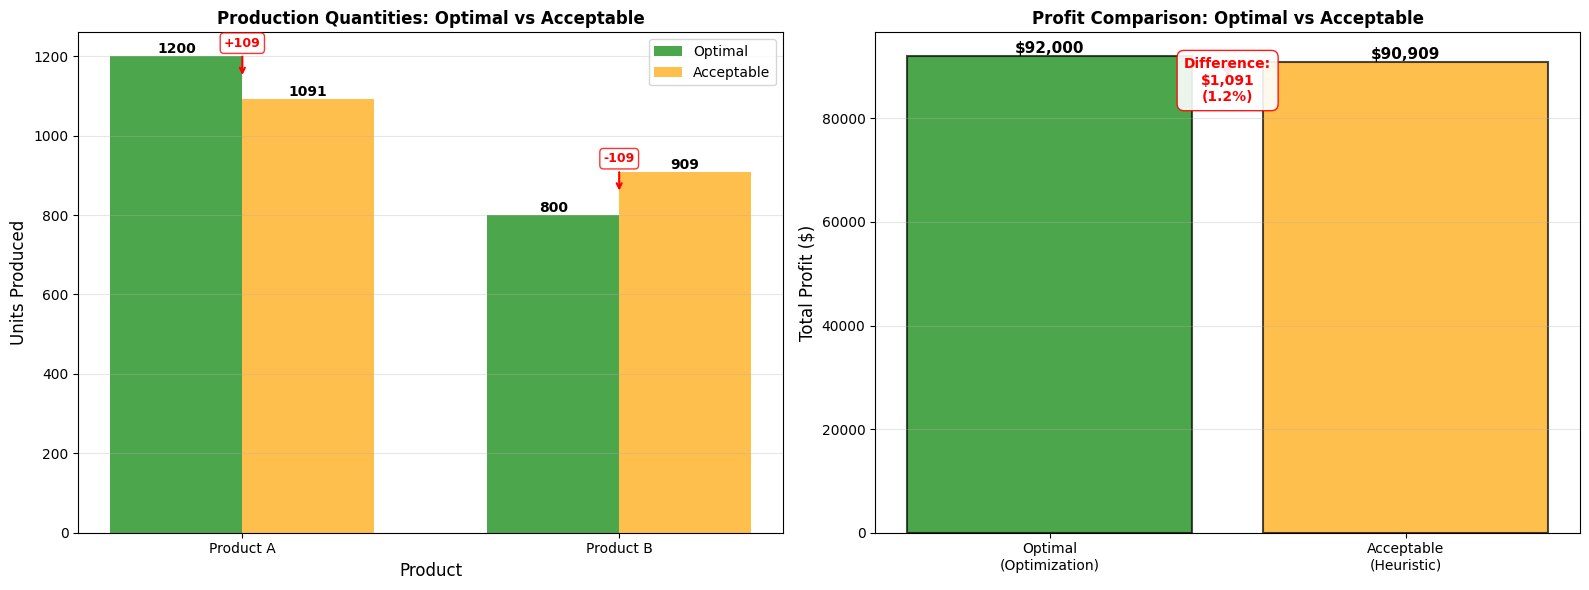


Key Insight:
  - Optimal solution achieves higher profit
  - But the difference may be small relative to the complexity
  - Acceptable solution may be sufficient for many decisions


In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Production quantities
ax1 = axes[0]
x = np.arange(2)
width = 0.35

bars1_opt = ax1.bar(x - width/2, [optimal_A, optimal_B], width, label='Optimal', color='green', alpha=0.7)
bars1_acc = ax1.bar(x + width/2, [acceptable_A, acceptable_B], width, label='Acceptable', color='orange', alpha=0.7)

# Add value labels on bars
for i, (bar_opt, bar_acc) in enumerate(zip(bars1_opt, bars1_acc)):
    # Label for optimal bar
    height_opt = bar_opt.get_height()
    ax1.text(bar_opt.get_x() + bar_opt.get_width()/2., height_opt,
             f'{height_opt:.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
    # Label for acceptable bar
    height_acc = bar_acc.get_height()
    ax1.text(bar_acc.get_x() + bar_acc.get_width()/2., height_acc,
             f'{height_acc:.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Add difference annotation in red
    diff_units = optimal_A - acceptable_A if i == 0 else optimal_B - acceptable_B
    if abs(diff_units) > 0.1:  # Only show if there's a meaningful difference
        mid_x_pos = x[i]
        mid_y_pos = (height_opt + height_acc) / 2
        text_y_pos = max(height_opt, height_acc) + abs(diff_units) * 0.15
        
        ax1.annotate(f'{diff_units:+.0f}',
                    xy=(mid_x_pos, mid_y_pos),
                    xytext=(mid_x_pos, text_y_pos),
                    arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
                    fontsize=9, ha='center', va='bottom', color='red', fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='red', alpha=0.8))

ax1.set_xlabel('Product', fontsize=12)
ax1.set_ylabel('Units Produced', fontsize=12)
ax1.set_title('Production Quantities: Optimal vs Acceptable', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(['Product A', 'Product B'])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Profit comparison
ax2 = axes[1]
methods = ['Optimal\n(Optimization)', 'Acceptable\n(Heuristic)']
profits = [optimal_profit, acceptable_profit]
colors = ['green', 'orange']

bars = ax2.bar(methods, profits, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Total Profit ($)', fontsize=12)
ax2.set_title('Profit Comparison: Optimal vs Acceptable', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, profit in zip(bars, profits):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${profit:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add difference annotation
diff = optimal_profit - acceptable_profit
# Position annotation between the two bars (bars are at positions 0 and 1)
mid_x = 0.5  # Position between the two bars (in data coordinates)
mid_y = (optimal_profit + acceptable_profit) / 2  # Midpoint between profits
    # Use axes coordinates for text position to ensure it's always at the top
    # Position text at 95% of the plot height (axes coordinates)

ax2.annotate(f'Difference:\n${diff:,.0f}\n({profit_diff_pct:.1f}%)',
             xy=(mid_x, mid_y),
                 xytext=(0.5, 0.95),  # Use axes coordinates (0.5 = center x, 0.95 = 95% up)
                 textcoords='axes fraction',  # Interpret xytext as axes fraction
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, ha='center', va='top', color='red', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='red', alpha=0.9))


plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("  - Optimal solution achieves higher profit")
print("  - But the difference may be small relative to the complexity")
print("  - Acceptable solution may be sufficient for many decisions")


## Step 8: When Is Optimal Necessary vs When Is Acceptable Sufficient?

The choice between optimal and acceptable depends on the decision context:


In [32]:
# Scenario analysis: When does the difference matter?

# Calculate the difference in absolute and percentage terms
absolute_diff = optimal_profit - acceptable_profit
percent_diff = (absolute_diff / acceptable_profit) * 100

print("DECISION CONTEXT ANALYSIS:")
print("=" * 60)
print(f"  Optimal profit: ${optimal_profit:,.2f}")
print(f"  Acceptable profit: ${acceptable_profit:,.2f}")
print(f"  Difference: ${absolute_diff:,.2f} ({percent_diff:.2f}%)")
print(f"\nWhen is optimal necessary?")
print(f"  - High stakes: If this decision affects millions of dollars")
print(f"  - Large differences: If {percent_diff:.2f}% represents significant value")
print(f"  - Time available: If you have time to build and run optimization")
print(f"\nWhen is acceptable sufficient?")
print(f"  - Low stakes: If this is a routine decision")
print(f"  - Small differences: If {percent_diff:.2f}% is not significant")
print(f"  - Time pressure: If you need a solution quickly")
print(f"\nIn this example:")
if percent_diff < 5:
    recommendation = "Acceptable is likely sufficient (difference < 5%)"
elif percent_diff < 10:
    recommendation = "Consider context - difference is moderate (5-10%)"
else:
    recommendation = "Optimal may be worth it (difference > 10%)"

print(f"  {recommendation}")
print(f"\nKey Insight:")
print(f"  - The value of optimality must exceed the cost of finding it")
print(f"  - Managerial judgment determines when optimal is necessary")


DECISION CONTEXT ANALYSIS:
  Optimal profit: $92,000.00
  Acceptable profit: $90,909.09
  Difference: $1,090.91 (1.20%)

When is optimal necessary?
  - High stakes: If this decision affects millions of dollars
  - Large differences: If 1.20% represents significant value
  - Time available: If you have time to build and run optimization

When is acceptable sufficient?
  - Low stakes: If this is a routine decision
  - Small differences: If 1.20% is not significant
  - Time pressure: If you need a solution quickly

In this example:
  Acceptable is likely sufficient (difference < 5%)

Key Insight:
  - The value of optimality must exceed the cost of finding it
  - Managerial judgment determines when optimal is necessary


## Summary: Optimal vs Acceptable Solutions

**Optimal Solutions**:
- Best possible solution according to your objectives
- Found through systematic optimization
- Takes time and computational resources
- May be only slightly better than acceptable

**Acceptable Solutions**:
- Solutions that meet your needs adequately
- Found through heuristics or simple rules
- Found quickly with minimal resources
- May be nearly as good as optimal

**When to optimize**:
- High stakes decisions
- Large differences between optimal and acceptable
- Time and resources available
- Optimality is necessary

**When to accept good enough**:
- Low stakes decisions
- Small differences between optimal and acceptable
- Time pressure or limited resources
- Acceptable is sufficient

**Critical insight**: 
- Optimal is best for your objectives, but acceptable may be sufficient
- The value of optimality must exceed the cost of finding it
- Managerial judgment determines when to optimize and when to accept good enough

**Practical implication**:
- Don't always chase optimal when acceptable would work
- Don't accept suboptimal when optimality is important
- Make informed choices based on decision context
